In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm


In [51]:
# Load the dataset
train_file_path = '/content/train.csv'
test_file_path = '/content/test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Display the first few rows of the training dataset
print(train_df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [52]:
# Selecting relevant features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']  # Adjusted based on actual column names
X = train_df[features]
y = train_df['SalePrice']  # Corrected target variable name

# Verify the first few rows of X and y to ensure correct selection
print(X.head())
print(y.head())

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# The rest of your model training and evaluation code goes here...


   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [53]:
# Simple Linear Regression
simple_model = LinearRegression()
simple_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_simple = simple_model.predict(X_val_scaled)

# Evaluating the model
mse_simple = mean_squared_error(y_val, y_pred_simple)
r2_simple = r2_score(y_val, y_pred_simple)

print(f"Simple Linear Regression MSE: {mse_simple}")
print(f"Simple Linear Regression R2: {r2_simple}")


Simple Linear Regression MSE: 2806426667.247134
Simple Linear Regression R2: 0.6341189942329308


In [54]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred_poly = poly_model.predict(X_val_poly)

# Evaluating the model
mse_poly = mean_squared_error(y_val, y_pred_poly)
r2_poly = r2_score(y_val, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression R2: {r2_poly}")


Polynomial Regression MSE: 2710225757.277905
Polynomial Regression R2: 0.6466609523414515


In [55]:
# Adding a constant for OLS regression
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Summary of the OLS model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     504.4
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          6.18e-210
Time:                        15:17:37   Log-Likelihood:                -14316.
No. Observations:                1168   AIC:                         2.864e+04
Df Residuals:                    1164   BIC:                         2.866e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+05   1492.633    121.558      0.0

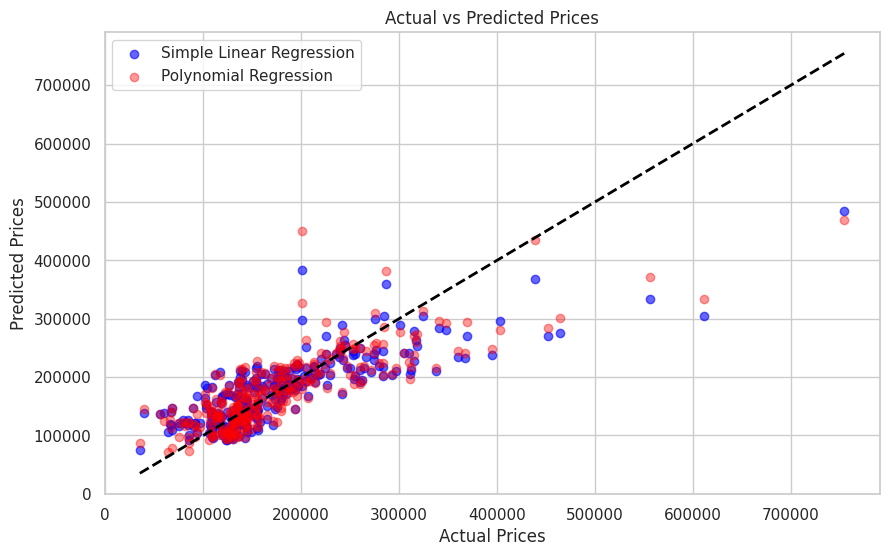

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_simple, color='blue', alpha=0.6, label='Simple Linear Regression')
plt.scatter(y_val, y_pred_poly, color='red', alpha=0.4, label='Polynomial Regression')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='black', lw=2, linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


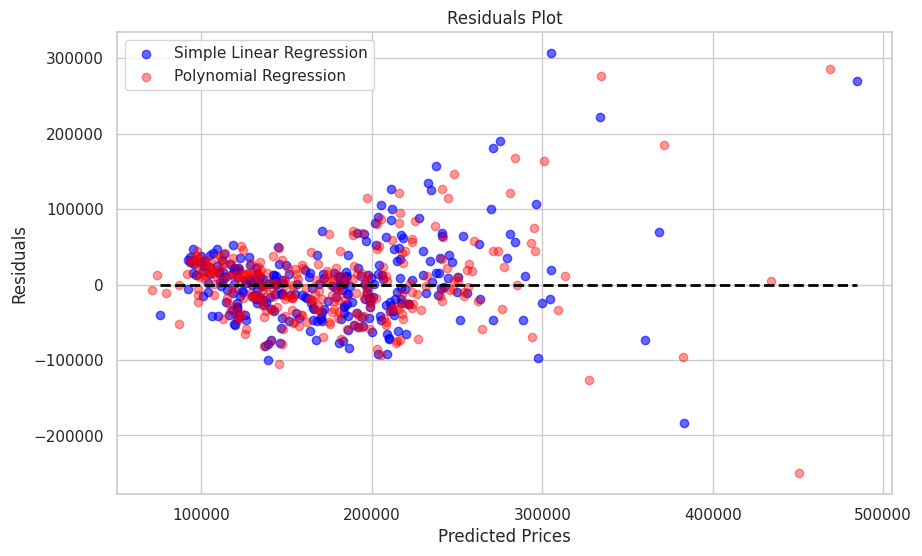

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_simple, y_val - y_pred_simple, color='blue', alpha=0.6, label='Simple Linear Regression')
plt.scatter(y_pred_poly, y_val - y_pred_poly, color='red', alpha=0.4, label='Polynomial Regression')
plt.hlines(y=0, xmin=min(y_pred_simple), xmax=max(y_pred_simple), color='black', lw=2, linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.legend()
plt.show()


<ipython-input-58-38f17356a454>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


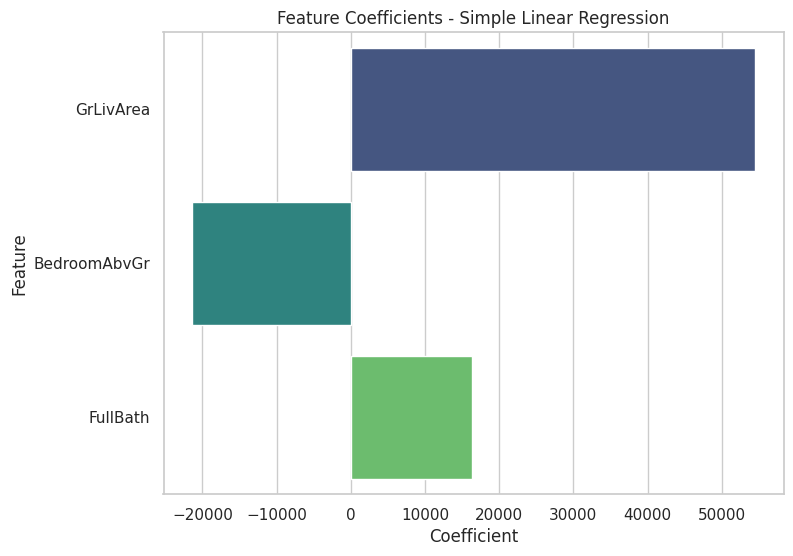

In [58]:
# Coefficients for Simple Linear Regression
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': simple_model.coef_})

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Coefficients - Simple Linear Regression')
plt.show()


<ipython-input-59-3b0248bbbb10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_poly, palette='plasma')


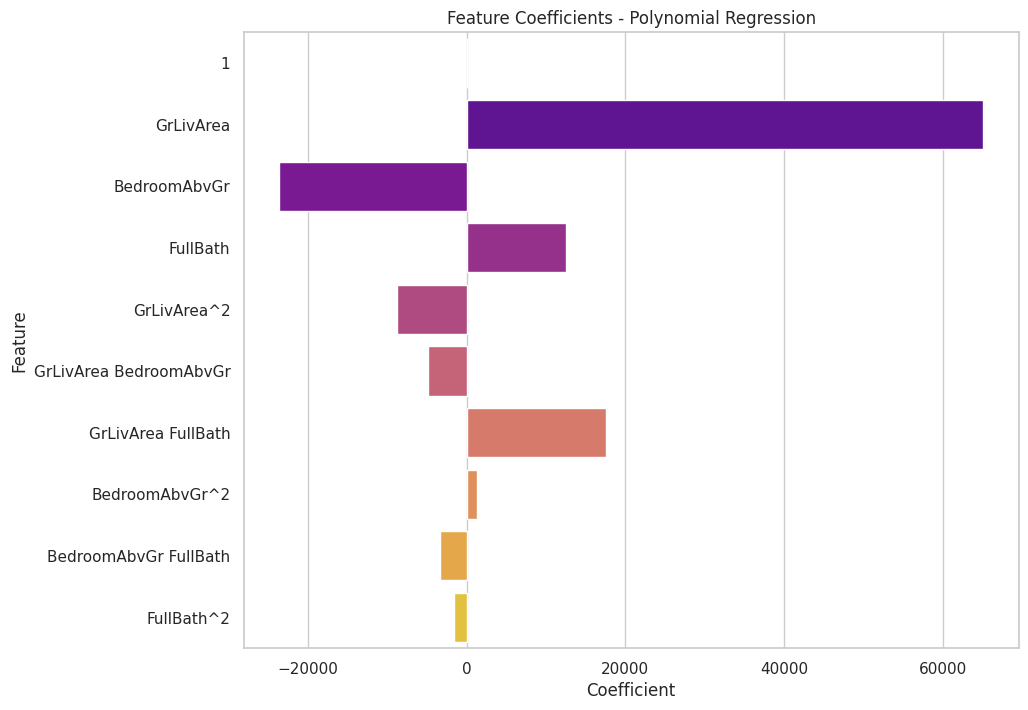

In [59]:
# Coefficients for Polynomial Regression
poly_features = poly.get_feature_names_out(features)  # Corrected method
coefficients_poly = pd.DataFrame({'Feature': poly_features, 'Coefficient': poly_model.coef_})

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_poly, palette='plasma')
plt.title('Feature Coefficients - Polynomial Regression')
plt.show()

In [62]:
print(f"Simple Linear Regression R2: {r2_simple}")
print(f"Polynomial Regression R2: {r2_poly}")


Simple Linear Regression R2: 0.6341189942329308
Polynomial Regression R2: 0.6466609523414515
